In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import mpl_scatter_density


from core.models import EllipsoidRegion
from core.models import Category
from rockstar.models import RockstarHalo

import pandas as pd

In [2]:
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=1., vmax=1000, stretch=LogStretch())

In [3]:
cat = Category.objects.filter(name='selection 2')[0]

regions = EllipsoidRegion.objects.filter(category=cat)

In [4]:
df_selected = pd.read_hdf("../media/selected.hdf5", key='2017-07-24 20:16:20.495943')
hids = df_selected.hid.values

In [5]:
hid = 21971

halo = RockstarHalo.objects.filter(hid=hid)[0]
region = EllipsoidRegion.objects.filter(category=cat, structure=halo)[0]

fname = region.get_point_filename()
fname

'/home/lbignone/Development/hog/media/regions/58/58_region_point_file.txt'

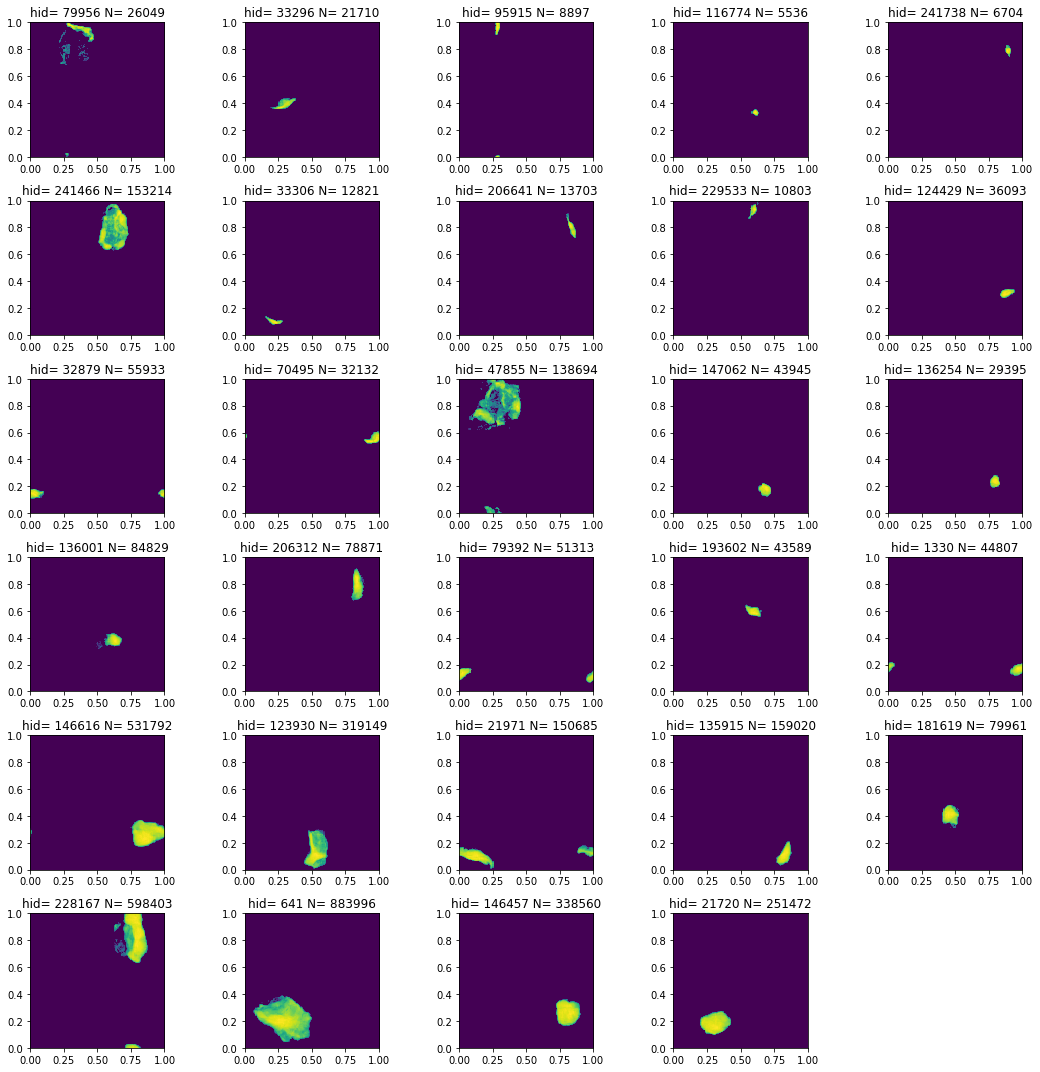

In [13]:
fig = plt.figure(figsize=(15, 15))


for i, hid in enumerate(hids):
    
    ax = fig.add_subplot(6, 5, i+1, projection='scatter_density')
    
    halo = RockstarHalo.objects.filter(hid=hid)[0]
    region = EllipsoidRegion.objects.filter(category=cat, structure=halo)[0]

    fname = region.get_point_filename()
    data = np.genfromtxt(fname)
    
    x = data[:, 0]
    y = data[:, 1]

    ax.scatter_density(x, y, norm=norm)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    ax.set_title('hid= ' + str(int(hid)) + ' N= ' + str(len(data)))
    
    ax.set_aspect('equal')
    
plt.tight_layout()

In [8]:
cat

<Category: Lim_6Rvir>

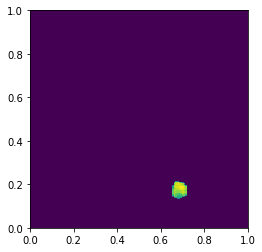

In [7]:
cat = Category.objects.filter(name='Lim_4Rvir')[0]

halo = RockstarHalo.objects.filter(hid=147062)[0]
reg = EllipsoidRegion.objects.filter(category=cat, structure=halo)[0]

fname = reg.get_point_filename()

data = np.genfromtxt(fname)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

x = data[:, 0]
y = data[:, 1]

ax.scatter_density(x, y, norm=norm)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
    
ax.set_aspect('equal')

In [12]:
0.02 * 50000

1000.0

In [8]:
reg.get_path()

'/home/lbignone/Development/hog/media/regions/47/'

In [25]:
from gadget.utils import get_region_in_radius
from gadget.models import Snapshot

from rockstar.utils import get_region_in_radius

In [20]:
snap = Snapshot.objects.filter(snap_number=14)

In [26]:
hid = 70495

halo = RockstarHalo.objects.filter(hid=hid)[0]

rvir = halo.get_radius()

rtb = 10

reg = get_region_in_radius(halo, rtb*rvir)

<EllipsoidRegion: out512/14/Catalogue/70495>